In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [3]:
cr = pd.read_csv('Credit Risk.csv')

In [4]:
cr

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
0,45,13,0,6,-0.266443,1
1,40,4,0,0,-0.043743,0
2,38,2,1,0,-0.418246,0
3,30,5,0,0,-1.453289,0
4,49,7,0,1,-0.097392,0
...,...,...,...,...,...,...
149995,74,4,0,1,-3.201527,0
149996,44,4,0,1,-1.204973,0
149997,58,18,0,1,-1.402424,0
149998,30,4,0,0,-1.969432,0


In [5]:
cr.isnull()

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
149995,False,False,False,False,False,False
149996,False,False,False,False,False,False
149997,False,False,False,False,False,False
149998,False,False,False,False,False,False


In [6]:
cr.isnull().sum() #checking missing data

Age                  0
ActiveLoans          0
Due90Days            0
RealEstateLoans      0
CrLineUtilization    0
Default              0
dtype: int64

<AxesSubplot:xlabel='Default', ylabel='count'>

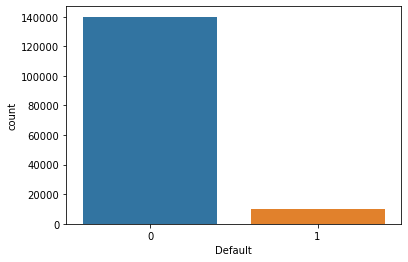

In [7]:
sns.countplot(x=cr["Default"])

<AxesSubplot:xlabel='Due90Days', ylabel='count'>

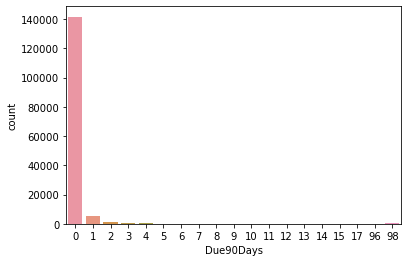

In [8]:
sns.countplot(x=cr["Due90Days"])

<AxesSubplot:xlabel='RealEstateLoans', ylabel='count'>

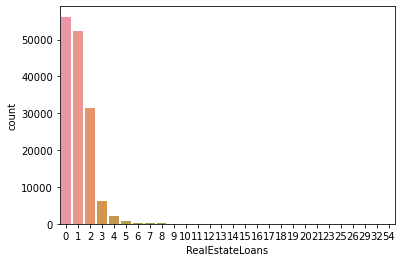

In [9]:
sns.countplot(x=cr["RealEstateLoans"])

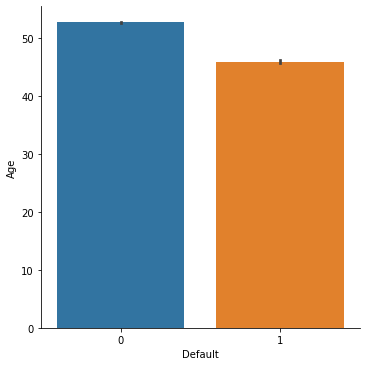

In [10]:
sns.catplot(data=cr, x="Default", y="Age", kind="bar") #people having age above 45 years have less chance of being default

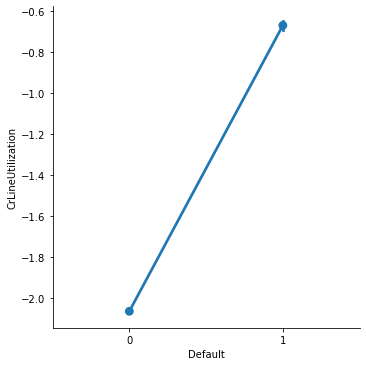

In [11]:
sns.catplot(data=cr, x="Default", y="CrLineUtilization", kind="point") # less crlineutilization more chance of being default

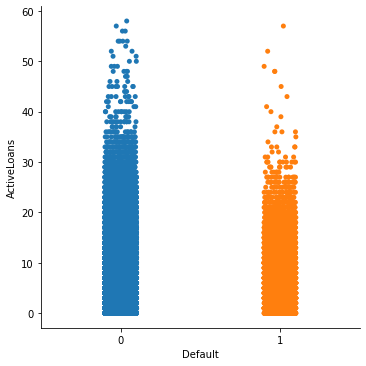

In [12]:
sns.catplot(data=cr, x="Default", y="ActiveLoans", kind="strip")# people having active loans have less chance of being default

In [ ]:
sns.catplot(data=cr, x="Default", y="Due90Days", kind="swarm")

In [ ]:
sns.catplot(data=cr, x="Default", y="RealEstateLoans", kind="bar")

In [ ]:
sns.pairplot(cr,hue="Default",palette="Dark2")

In [ ]:
plt.title("ActiveLoans and Default")
sns.scatterplot(x="RealEstateLoans",y="ActiveLoans",data=cr,hue="Default",palette="bright")

In [ ]:
cr.describe()

In [ ]:
#mean is almost same as median in almost all variables so the date is  not skewed
#although SD is not that high but there is a small gap between Q3 and Q1
#lets check the outliers through box plot
#Lets check the data distribution through dist plot


In [ ]:
sns.distplot(cr["ActiveLoans"],bins=20) 

In [ ]:
sns.distplot(cr["Due90Days"],bins=20)

In [ ]:
sns.distplot(cr["RealEstateLoans"],bins=20)

In [ ]:
cr.skew()# 

In [ ]:
#removing skewness
cr["ActiveLoans"]=np.cbrt(cr["ActiveLoans"])

In [ ]:
sns.distplot(cr["ActiveLoans"],bins=20) 

In [ ]:
cr["Due90Days"]=np.cbrt(cr["Due90Days"])

In [ ]:
sns.distplot(cr["Due90Days"],bins=20) 

In [ ]:
cr["RealEstateLoans"]=np.cbrt(cr["RealEstateLoans"])

In [ ]:
#checking outliers through box plot
cr["Age"].plot.box()# 

In [ ]:
cr["ActiveLoans"].plot.box()

In [ ]:
cr["RealEstateLoans"].plot.box()

In [ ]:
cr["Due90Days"].plot.box()

In [ ]:
cr["CrLineUtilization"].plot.box()

In [ ]:
minthershold,maxthershold=cr.Age.quantile([0.001,0.999])
minthershold,maxthershold

In [ ]:
cr[cr.Age<minthershold]

In [ ]:
cr[cr.Age>maxthershold]

In [ ]:
CR=cr[(cr.Age<maxthershold)&(cr.Age>minthershold)]

In [ ]:
corr_hmap=cr.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [ ]:
x = cr.drop('Default', axis=1).copy()

In [ ]:
# no multicollinearity found, checking multicollinearity by variance inflation factor
#Here except crlineutilization and duein90days every other factors are negatively correlated
#But active loans and real estate loans must be postively correlated with default, lets validate with logistic regression

In [ ]:
x

In [ ]:
y = cr['Default'].copy()
y

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

In [ ]:
lg.coef_

In [ ]:
lg.intercept_

In [ ]:
pred=lg.predict(x_test)

In [ ]:
pred

In [ ]:
accuracy_score(y_test,pred)
#accuracy is the no of correct predictions/total no of predictions

In [ ]:
print(confusion_matrix(y_test,pred))
#it shows type 1 and type 2 error

In [ ]:
print(classification_report(y_test,pred))
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision), shows what % of positive predictions are correct
#precision says hat % of predictions are correct
#Precision = TP/(TP + FP), it is accuracy of positive predictions
#Recall is the fraction of positive that are correctly identified
#Recall = TP/(TP+FN)

In [ ]:
p=confusion_matrix(y_test,pred)
sns.heatmap(p,annot=True)

In [ ]:
lg.coef_

In [ ]:
lg.intercept_

In [ ]:
lg.score(x_train,y_train)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [ ]:
y_pred_prob

In [ ]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [ ]:
fpr
#FPR=FP/FP+TN

In [ ]:
tpr
#TPR=TP/TP+FN, FN is False negative and TP is true Positive

In [ ]:
thersholds

In [ ]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [ ]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [ ]:
auc_score

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()
x=st.fit_transform(x)
x
#Standard scalling is done to make the datapoints generalised so the distance between them is lower

In [ ]:
X=pd.DataFrame(data=x)
X

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

In [ ]:
lg.score(x_train,y_train)

In [ ]:
y_pred_prob=lg.predict_proba(X_test)[:,1]

In [ ]:
auc_score=roc_auc_score(y_test,lg.predict(X_test))

In [ ]:
auc_score

In [ ]:
lg.coef_

In [ ]:
lg.intercept_

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
st=MinMaxScaler()
x=st.fit_transform(x)
x

In [ ]:
xx=pd.DataFrame(data=x)
xx

In [ ]:
xx_train,xx_test,y_train,y_test=train_test_split(xx,y,test_size=0.20,random_state=42)

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(xx_train,y_train)

In [ ]:
lg.score(xx_train,y_train)

In [ ]:
y_pred_prob=lg.predict_proba(xx_test)[:,1]

In [ ]:
auc_score=roc_auc_score(y_test,lg.predict(X_test))

In [ ]:
auc_score

In [ ]:
lg.coef_

In [ ]:
lg.intercept_

In [ ]:
#Minmax scalling model is giving best result As accuracy score is 0.93 and auc score is 0.73, so business
#firm should use this model to predict the defaulter
# Due90days and crutilization are the most important factors because these are highly positive coefficient compared 
#to other factors hence it these increases then chance of being defaulter also increases
#Activeloans and realestate loans are also have positive coeficient hence if these increases chance of being defaulter
#increases
#Age is negatvely coorelated hence aged person are most likely to become non defaulter  because they have savings as well as 
#high income